1. 적용되어있는 k-means를 참고 하여, 엘보우 방법을 사용하여 최적의 클러스터 개수를 찾아보세요.

2. 실루엣 그래프로 군집 품질을 정량화해 보세요.

3. 적용되어 있는 계층 군집을 참고 하여, 히트맵에 덴드로그램이 연결되어 보도록 시각화 해보세요.

4. DBSCAN을 사용하여 군집 분석을 적용해보세요.

4. k-평균 알고리즘과 완전 연결 병합 군집 그리고 DBSCAN 알고리즘 결과를 한번에 볼 수 있게 (3개 그래프를 나란히) 시각화 해보세요.

In [1]:
import numpy as np
import pandas as pd
from pandas import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
y=[[2,3],[2,4],[3,4]]

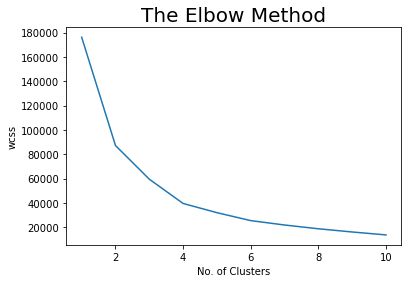

In [4]:
from sklearn.cluster import KMeans
x = data.iloc[:, y[0]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

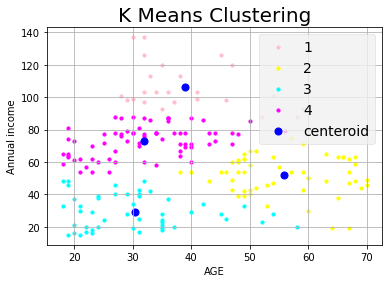

In [5]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 10, c = 'pink', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 10, c = 'yellow', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 10, c = 'cyan', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 10, c = 'magenta', label = '4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('AGE')
plt.ylabel('Annual income')
plt.legend()
plt.grid()
plt.show()

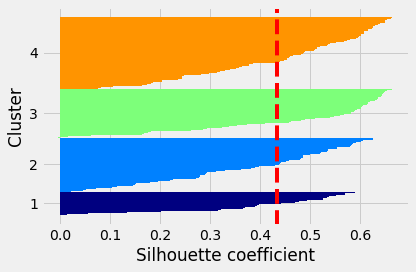

In [6]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [7]:
x=data.iloc[:, y[0]]

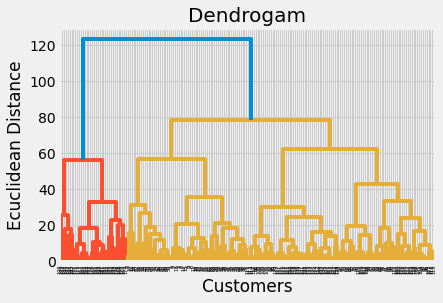

In [8]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

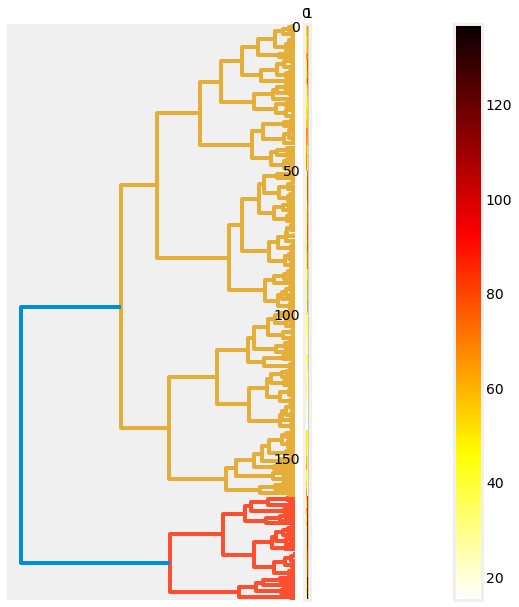

In [9]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.1, 0.1, 0.5, 1])
# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요
row_dendr =sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'),orientation='left')
df_rowclust = x.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축을 제거합니다.
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵을 출력합니다.
axm = fig.add_axes([-3.375, 0.1, 5, 1])  # x-위치, y-위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

plt.show()

In [10]:
x=data.iloc[:, y[0]].values

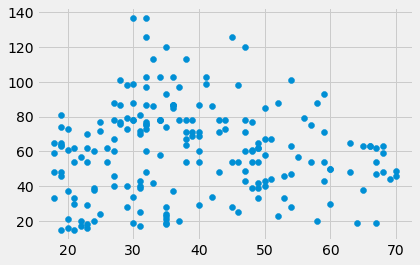

In [11]:
plt.scatter(x[:, 0], x[:, 1])

In [12]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)

In [13]:
y_db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

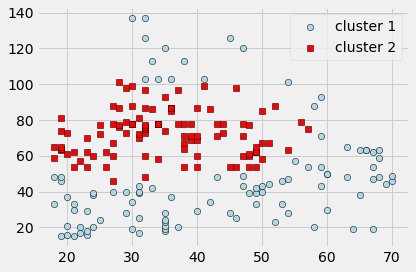

In [14]:
plt.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
print(x[y_db == 0, 0], x[y_db == 0, 1])
plt.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
plt.legend()
plt.tight_layout()
plt.show()

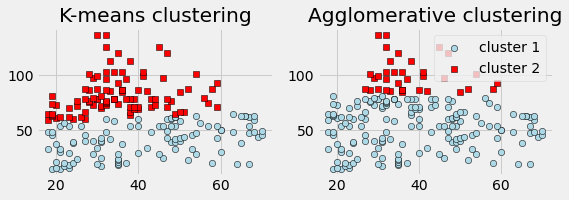

In [15]:
from sklearn.cluster import AgglomerativeClustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

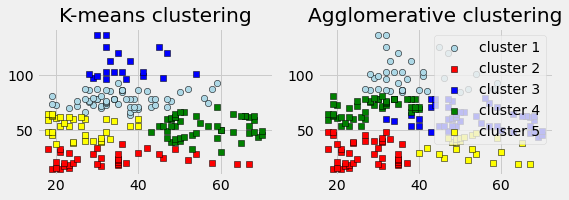

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

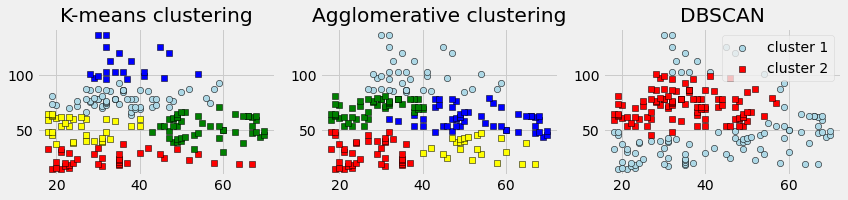

In [17]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)
ax3.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
ax3.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
ax3.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
ax3.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
ax3.set_title('DBSCAN')

plt.legend()
plt.tight_layout()
plt.show()

# elbow 4

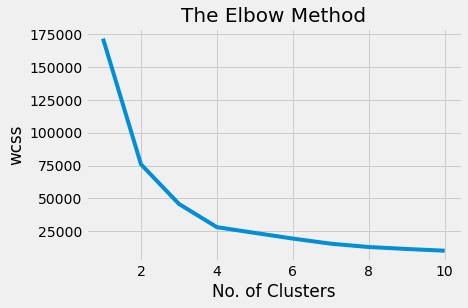

In [18]:
x = data.iloc[:, y[1]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# elbow 4

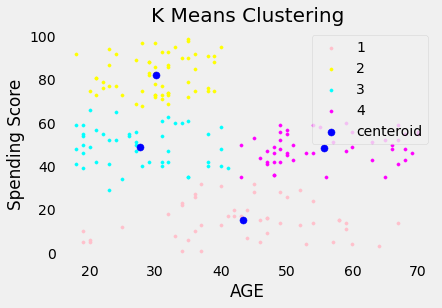

In [19]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 10, c = 'pink', label = '1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 10, c = 'yellow', label = '2')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 10, c = 'cyan', label = '3')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 10, c = 'magenta', label = '4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('AGE')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

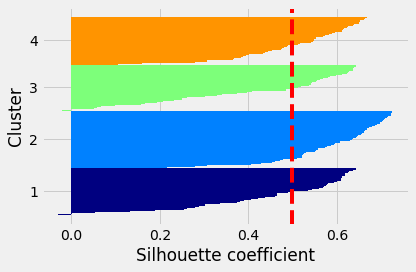

In [20]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [21]:
x=data.iloc[:, y[1]]

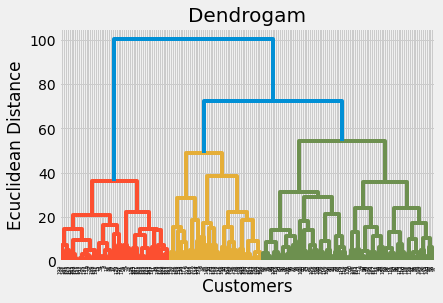

In [22]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

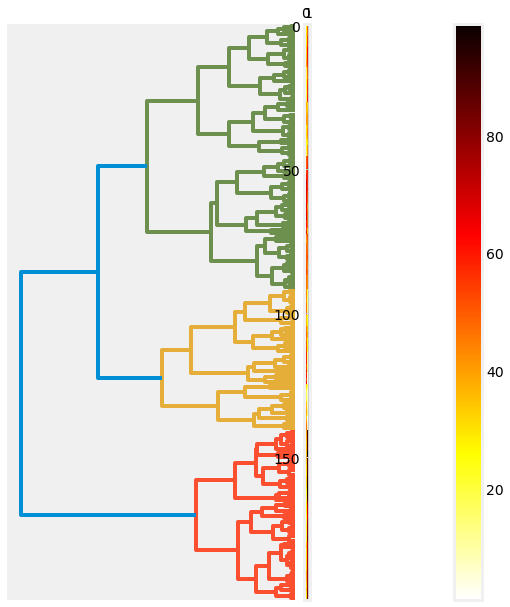

In [23]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.1, 0.1, 0.5, 1])
# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요
row_dendr =sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'),orientation='left')
df_rowclust = x.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축을 제거합니다.
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵을 출력합니다.
axm = fig.add_axes([-3.375, 0.1, 5, 1])  # x-위치, y-위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

plt.show()

In [24]:
x=data.iloc[:, y[1]].values

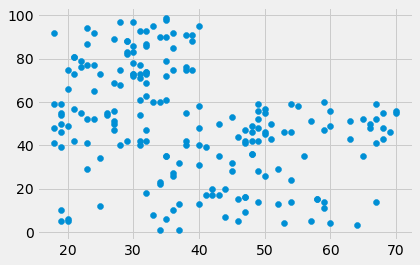

In [25]:
plt.scatter(x[:, 0], x[:, 1])

In [26]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)

In [27]:
y_db

array([ 0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0,
       -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,
       -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,
       -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1,
        0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0, -1,  0])

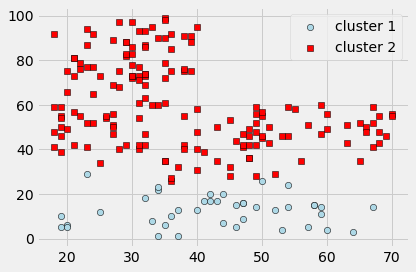

In [28]:
plt.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
print(x[y_db == 0, 0], x[y_db == 0, 1])
plt.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
plt.legend()
plt.tight_layout()
plt.show()

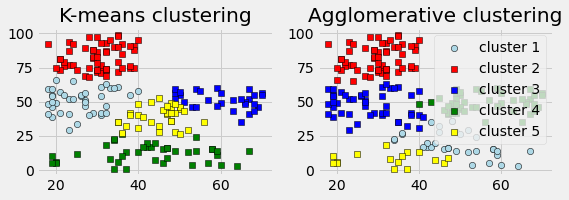

In [29]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

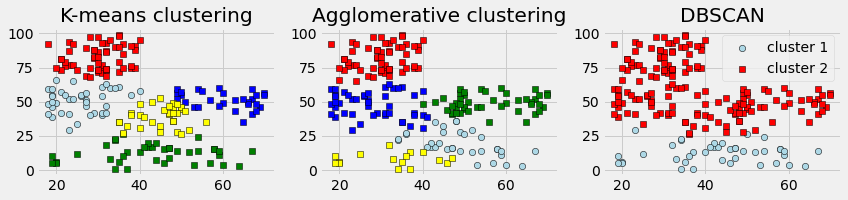

In [30]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)
ax3.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
ax3.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
ax3.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
ax3.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
ax3.set_title('DBSCAN')

plt.legend()
plt.tight_layout()
plt.show()

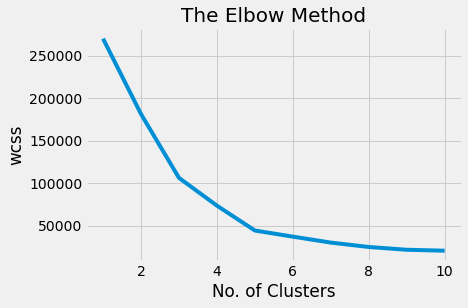

In [31]:
x = data.iloc[:, y[2]].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

# elbow 5

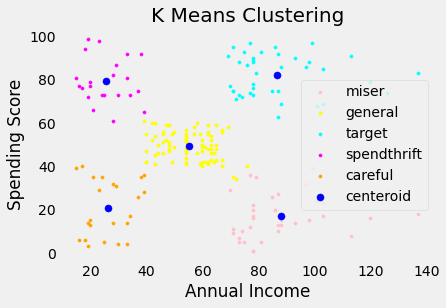

In [32]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 10, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 10, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 10, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 10, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 10, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# target 돈을 많이 벌면서 돈을 많이 쓰는
### miser => 구두쇠
### general => 일반
### target target
### spendthrift => 씀씀이가 헤픈

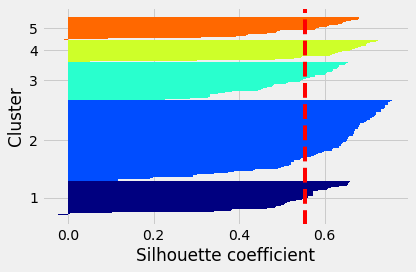

In [33]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=5, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

In [34]:
x=data.iloc[:, y[2]]

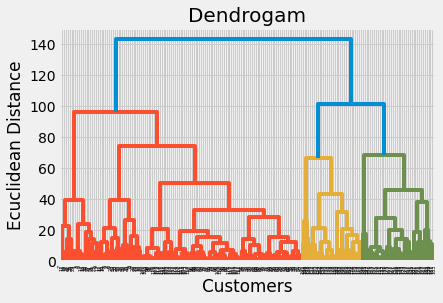

In [35]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

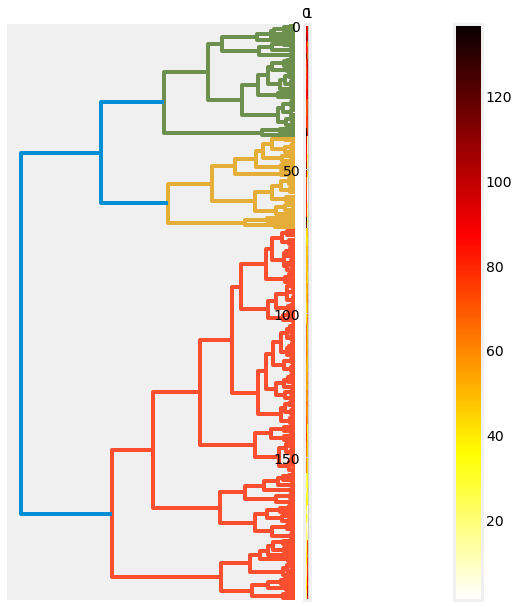

In [36]:
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.1, 0.1, 0.5, 1])
# 노트: matplotlib < v1.5.1일 때는 use orientation='right'를 사용하세요
row_dendr =sch.dendrogram(sch.linkage(x,method='complete',metric='euclidean'),orientation='left')
df_rowclust = x.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# 덴드로그램의 축을 제거합니다.
for i in axd.spines.values():
    i.set_visible(False)

# 히트맵을 출력합니다.
axm = fig.add_axes([-3.375, 0.1, 5, 1])  # x-위치, y-위치, 너비, 높이
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)

plt.show()

In [37]:
x=data.iloc[:, y[2]].values

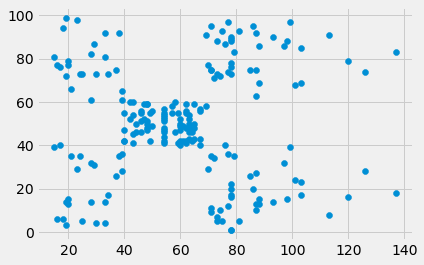

In [38]:
plt.scatter(x[:, 0], x[:, 1])

In [39]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)

In [40]:
y_db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

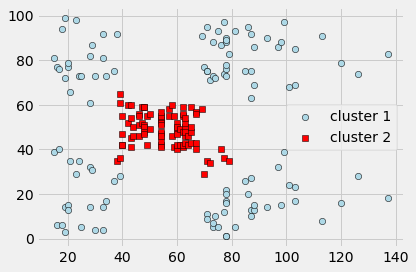

In [41]:
plt.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
print(x[y_db == 0, 0], x[y_db == 0, 1])
plt.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
plt.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
plt.legend()
plt.tight_layout()
plt.show()

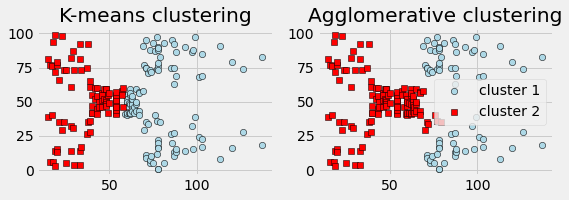

In [42]:
from sklearn.cluster import AgglomerativeClustering
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

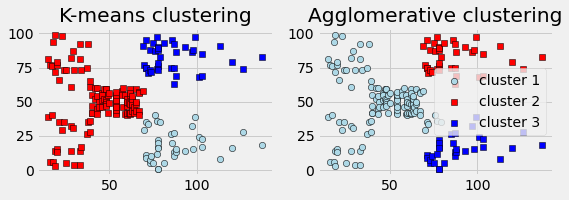

In [43]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=3, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

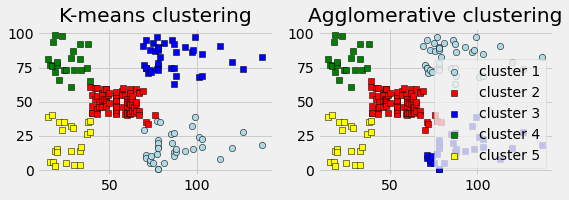

In [44]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

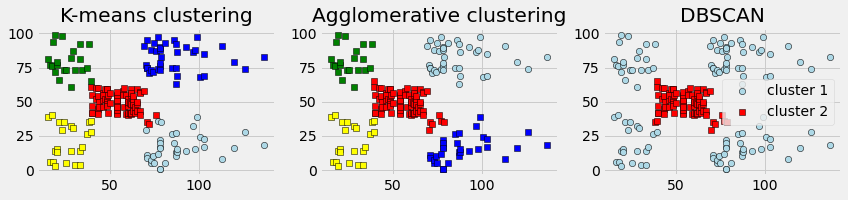

In [45]:
f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(12, 3))
km = KMeans(n_clusters=5, random_state=0)
y_km = km.fit_predict(x)
ax1.scatter(x[y_km == 0, 0], x[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(x[y_km == 1, 0], x[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.scatter(x[y_km == 2, 0], x[y_km == 2, 1],
            edgecolor='black',
            c='blue', marker='s', s=40, label='cluster 3')
ax1.scatter(x[y_km == 3, 0], x[y_km == 3, 1],
            edgecolor='black',
            c='green', marker='s', s=40, label='cluster 4')
ax1.scatter(x[y_km == 4, 0], x[y_km == 4, 1],
            edgecolor='black',
            c='yellow', marker='s', s=40, label='cluster 5')

ax1.set_title('K-means clustering')



ac = AgglomerativeClustering(n_clusters=5,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(x)
ax2.scatter(x[y_ac == 0, 0], x[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(x[y_ac == 1, 0], x[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.scatter(x[y_ac == 2, 0], x[y_ac == 2, 1], c='blue',
            edgecolor='black',
            marker='s', s=40, label='cluster 3')
ax2.scatter(x[y_ac == 3, 0], x[y_ac ==3, 1], c='green',
            edgecolor='black',
            marker='s', s=40, label='cluster 4')
ax2.scatter(x[y_ac == 4, 0], x[y_ac == 4, 1], c='yellow',
            edgecolor='black',
            marker='s', s=40, label='cluster 5')
ax2.set_title('Agglomerative clustering')

db = DBSCAN(eps=15, min_samples=40, metric='euclidean')
y_db = db.fit_predict(x)
ax3.scatter(x[y_db == -1, 0], x[y_db == -1, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
ax3.scatter(x[y_db == 0, 0], x[y_db == 0, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
"""
ax3.scatter(x[y_db == 2, 0], x[y_db == 2, 1],
            c='blue', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
ax3.scatter(x[y_db == 3, 0], x[y_db == 3, 1],
            c='green', marker='s', s=40,
            edgecolor='black', 
            label='cluster 3')
"""
ax3.set_title('DBSCAN')

plt.legend()
plt.tight_layout()
plt.show()